In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import datetime as dt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from statsmodels.tsa.regime_switching import MarkovSwitching

In [54]:
import statsmodels
print(statsmodels.__version__)


0.14.4


In [18]:
# Load the data
data = pd.read_csv('../data/brent_oil_price_cleaned.csv')  

Plot Historical Data with Rolling Statistics: Review both the original series and moving averages to better understand the trend and smooth short-term fluctuations.

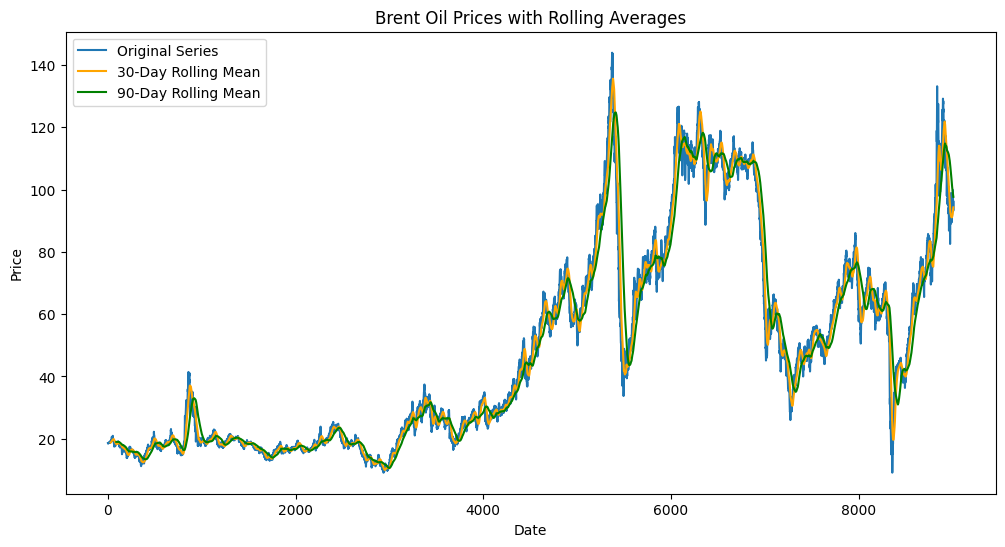

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Original Series')
plt.plot(data['Price'].rolling(window=30).mean(), label='30-Day Rolling Mean', color='orange')
plt.plot(data['Price'].rolling(window=90).mean(), label='90-Day Rolling Mean', color='green')
plt.title('Brent Oil Prices with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Historical Brent Oil Prices Analysis

This plot shows the historical Brent oil prices (in blue) along with two moving averages: a 30-day rolling mean (in orange) and a 90-day rolling mean (in green). Here’s what the plot suggests:

#### Original Series (Blue)
The blue line represents the raw historical Brent oil price data, capturing the day-to-day fluctuations in price. You can see periods of rapid price increase and decrease, as well as general trends and cycles over time.

#### 30-Day Rolling Mean (Orange)
The orange line, representing the 30-day rolling mean, smooths out short-term fluctuations and gives a more stable view of monthly price trends. It closely follows the original series but with reduced noise, allowing you to observe short-term patterns without daily volatility.

#### 90-Day Rolling Mean (Green)
The green line, representing the 90-day rolling mean, provides an even smoother trend line by averaging over a longer period. It shows the broader trends and seasonal cycles in Brent oil prices, helping to highlight long-term movements.

### Observations
- **Trend and Cycles**: The plot clearly shows that Brent oil prices exhibit cycles of rising and falling prices over extended periods. The peaks around certain intervals reflect major increases in oil prices, followed by declines.
- **Volatility**: The price appears to be quite volatile, especially during peak periods, where prices experience rapid changes. Both rolling averages help to stabilize this view, with the 90-day mean capturing the overall trend better by smoothing out short-term fluctuations.
- **Long-Term Trends**: There are periods of sustained growth (e.g., around 2008 and 2014) followed by sharp declines, possibly reflecting major economic or geopolitical events affecting oil prices globally.

### Insights
- Rolling averages are useful here for identifying patterns in the data that would be hard to observe in the raw series due to daily price volatility.
- The 30-day mean gives insight into monthly patterns, while the 90-day mean helps observe broader trends, which could inform more strategic, long-term decisions.
- Further analysis could investigate the causes behind specific spikes and drops in the prices and identify external factors influencing these movements, such as economic crises, geopolitical conflicts, or supply chain disruptions.


# Enhanced Modeling (ARIMA, SARIMA)
Auto ARIMA or SARIMA: Based on the insights, tune ARIMA or SARIMA parameters to capture any seasonal trends.

In [20]:
# Ensure the index is a DatetimeIndex
if not isinstance(data.index, pd.DatetimeIndex):
    data['Date'] = pd.to_datetime(data['Date'])  # Replace 'Date' with your actual date column name
    data.set_index('Date', inplace=True)

c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hermela

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -14517.086
Date:                Mon, 04 Nov 2024   AIC                          29050.171
Time:                        16:34:59   BIC                          29107.020
Sample:                             0   HQIC                         29069.514
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0594      0.006      9.613      0.000       0.047       0.072
ar.L2         -1.0104      0.006   -168.445      0.000      -1.022      -0.999
ar.L3          0.0224      0.008      2.918      0.0

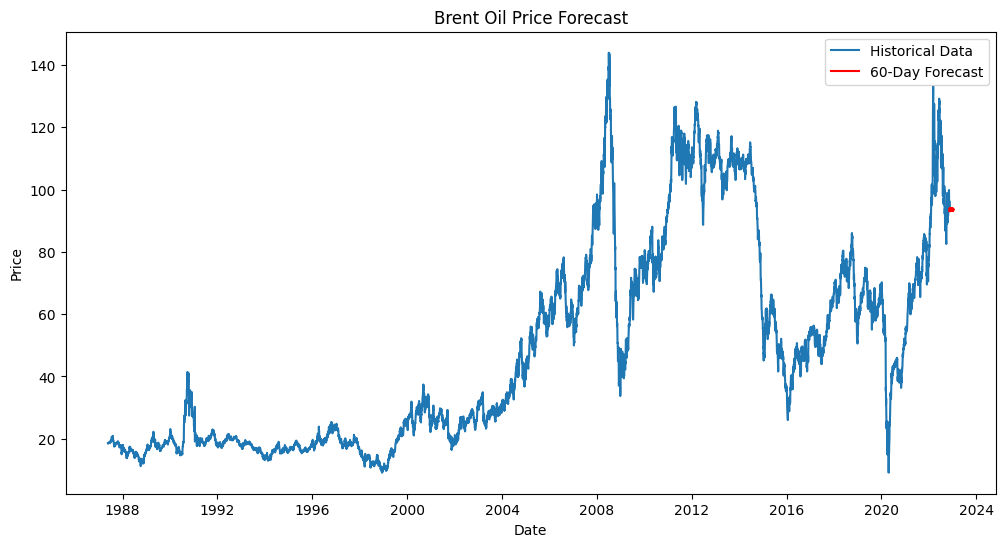

In [21]:
# Fitting ARIMA Model
model = ARIMA(data['Price'], order=(5, 1, 2))  # Example parameters; tune based on ACF/PACF plots or grid search
arima_model = model.fit()
print(arima_model.summary())

# Forecasting future values
forecast = arima_model.forecast(steps=60)  # Forecasting 60 days ahead
forecast.index = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=60)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Historical Data')
plt.plot(forecast, label='60-Day Forecast', color='red')
plt.title('Brent Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The SARIMAX results you've provided detail the outcomes of fitting an ARIMA model with seasonal components to the historical price data. Here's a breakdown of the key components and what they indicate:

### Model Summary:
- **Dependent Variable:** Price - This indicates that the model is predicting prices based on historical values.
- **No. Observations:** 9011 - The number of data points used in the analysis.
- **Model:** ARIMA(5, 1, 2) - This indicates the model specification:
  - 5: The number of autoregressive (AR) terms.
  - 1: The degree of differencing (to make the series stationary).
  - 2: The number of moving average (MA) terms.
- **Log Likelihood:** -14517.086 - A measure of the fit of the model; higher values indicate a better fit.
- **AIC (Akaike Information Criterion):** 29050.171 - A lower AIC suggests a better-fitting model when comparing multiple models.
- **BIC (Bayesian Information Criterion):** 29107.020 - Similar to AIC, but includes a penalty for the number of parameters; lower values indicate better models.
- **HQIC (Hannan-Quinn Information Criterion):** 29069.514 - Another model selection criterion.

### Coefficients:
- **AR Terms (ar.L1 to ar.L5):**
  - The coefficients for the autoregressive terms indicate the influence of previous price points on the current price.
  - For instance, ar.L1 = 0.0594 suggests that the previous price has a positive relationship with the current price.
  - ar.L2 = -1.0104 indicates a strong negative relationship with the price two time periods back.
  
- **MA Terms (ma.L1 and ma.L2):**
  - The moving average terms suggest the relationship between the current price and past forecast errors.
  - ma.L1 = -0.0303 shows a small negative impact from the first lag of errors, while ma.L2 = 0.9935 indicates a strong positive impact from the second lag of errors, implying that past errors significantly affect current predictions.

### Error Variance:
- **sigma2:** 1.4677 - This is the estimated variance of the residuals, which measures how much the actual prices deviate from the predicted prices. A lower value indicates a better fit.

### Diagnostics:
- **Ljung-Box (L1) (Q):** 0.09 and **Prob(Q):** 0.77 - This tests whether the residuals are uncorrelated. A high p-value (above 0.05) suggests no significant autocorrelation in the residuals, indicating that the model is well specified.
- **Jarque-Bera (JB):** 63156.33 and **Prob(JB):** 0.00 - This tests for normality of residuals. A low p-value indicates that the residuals are not normally distributed, which may indicate issues with the model.
- **Heteroskedasticity (H):** 10.99 and **Prob(H):** 0.00 - Indicates that the residuals may have non-constant variance. A low p-value suggests that the residuals exhibit heteroskedasticity.

### Summary Interpretation:
The model captures complex patterns in the data through its autoregressive and moving average components. The coefficients suggest that past prices and errors significantly influence the current price. The model appears to fit the data reasonably well based on the Ljung-Box test, but the non-normality and heteroskedasticity indicate that there may be further refinement needed or additional factors influencing the prices that are not captured in this model.


Explore advanced time series models such as VAR (Vector Autoregression) for multivariate time series analysis.

In [31]:
# Check for stationarity and difference the series if necessary
def test_stationarity(ts):
    result = adfuller(ts)
    return result[1] <= 0.05  # Returns True if the series is stationary

# Ensure all time series are stationary
for col in data.columns:
    if not test_stationarity(data[col]):
        data[col] = data[col].diff().dropna()

# Drop any NaN values created by differencing
data = data.dropna()

In [33]:

# Fit the VAR model
model = VAR(data)
results = model.fit(maxlags=15, ic='aic')

c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [34]:
# Display the summary of the model
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Nov, 2024
Time:                     16:45:07
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -14.7418
Nobs:                     8966.00    HQIC:                  -14.8693
Log likelihood:           16309.2    FPE:                3.26417e-07
AIC:                     -14.9351    Det(Omega_mle):     3.17683e-07
--------------------------------------------------------------------
Results for equation Price
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.097556         0.035587            2.741           0.006
L1.Price                 0.025292         0.015400            1.642           0.101
L1.Year                 -0.201752         0.7573

In [35]:
# Forecasting
forecast_steps = 10
forecast = results.forecast(data.values[-results.k_ar:], steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

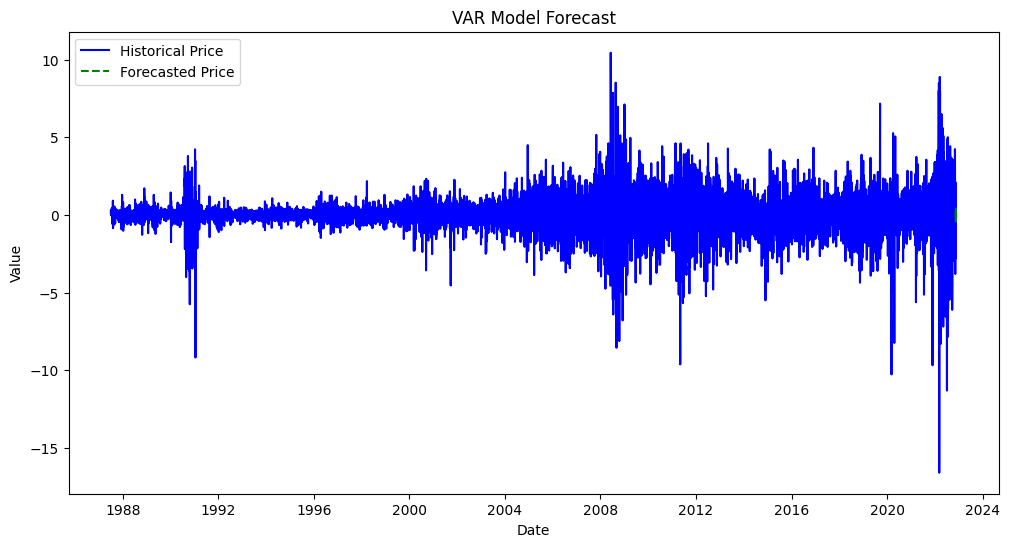

In [ ]:
# Create forecast DataFrame with all relevant columns
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Price', 'Year', 'Month', 'Rolling_Mean'])  # Replace 'Another_Column' with the actual name if necessary


# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Historical Price', color='blue')
plt.plot(forecast_df['Price'], label='Forecasted Price', color='green', linestyle='--')
plt.title('VAR Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


 Implement Markov-Switching ARIMA

In [51]:
# Define the Markov-Switching ARIMA model
model = MarkovSwitching(data['Price'], k_regimes=2, order=(1, 1, 1))  # 2 regimes with ARIMA(1,1,1)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

NameError: name 'MarkovSwitching' is not defined

In [ ]:
# Plot the smoothed probabilities of being in each regime
results.plot_probabilities()
plt.title('Smoothed Probabilities of Regime Switching')
plt.show()

# Forecasting
forecast = results.forecast(steps=10)
print(forecast)

In [58]:
import numpy as np
import pandas as pd
from pydlm import dlm, Trend, Seasonal

# Example data (replace with your actual time series data)
np.random.seed(42)
data = pd.Series(np.random.randn(100).cumsum() + 10)

# Create a dynamic linear model
model = dlm(data) + Trend(degree=1, name='trend') + Seasonal(period=12, name='seasonal')
model.fit()

# Forecasting
forecast_steps = 10
forecast = model.predictN(forecast_steps)

# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data, label='Historical Data', color='blue')
plt.plot(range(len(data), len(data) + forecast_steps), forecast, label='Forecast', color='green', linestyle='--')
plt.title('DLM Forecast with Markov Switching')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


ImportError: cannot import name 'Trend' from 'pydlm' (c:\Users\Hermela\Documents\10-Academy\Change-point-analysis-and-statistical-modelling--WEEK10\.venv\Lib\site-packages\pydlm\__init__.py)